In [1]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

##PARAMETERS
EXP_NAME = 'UDP'
MAX_ROUNDS = 699
MAX_YVAL = 14
# DEFINE OUTPUT DIR
RESULTS_DIR = os.path.join( os.getcwd(),'results/test/',EXP_NAME)
GRAPHS_DIR = os.path.join( os.getcwd(), 'graphs/test/',EXP_NAME)

##SET SEABORN STYLE
sns.set_style("whitegrid")
sns.set_context("paper")

##SET MATPLOTLIB STYLE
TICKS_FONTSIZE = 16
LABEL_FONTSIZE=18
LEGEND_FONTSIZE=15

mpl.rcParams['xtick.labelsize'] = TICKS_FONTSIZE 
mpl.rcParams['ytick.labelsize'] = TICKS_FONTSIZE
mpl.rcParams['legend.fontsize'] = TICKS_FONTSIZE
mpl.rcParams['axes.labelsize'] = LABEL_FONTSIZE
mpl.rcParams['axes.titlesize'] = LABEL_FONTSIZE
mpl.rcParams['font.size'] = LABEL_FONTSIZE
plt.rc('legend',**{'fontsize':LEGEND_FONTSIZE})


######################### BASIC FUNCTIONS  ###########################
#######################################################################


def read_results():
	"""Reads the results for all the nodes and returns
	a list of pandas Dataframes, one for each node"""
	#Get list of nodes(files) with results
	nodes = [f for f in os.listdir(RESULTS_DIR) if os.path.isfile(os.path.join(RESULTS_DIR, f))]
	#Load results from each node
	nodes_results = {}
	for node in nodes:
		f = os.path.join(RESULTS_DIR,node)
		try:
			nodes_results[node] = pd.read_csv(f)
			nodes_results[node] = nodes_results[node].replace('None',np.nan)
		except Exception:
			print('EXception')
	return nodes_results

def plot_var_per_round(results, var):
	"""Plot the median acrros nodes of a variable"""
	median = getMedianDF(results,var)
	#Create new figure
	fig = plt.figure()
	#Print the plot
	median.plot()
	#Modify parameters
	plt.ylabel(var)
	plt.xlabel('rounds')
	plt.xlim(0,MAX_ROUNDS)
	plt.ylim(0,MAX_YVAL)
	#Dummy line to avoid bug of matplotlib that closes image right after plot
	#It's a readline function, just press enter
	#input('Done')
	#You can also automatically save figures
	fig.savefig(os.path.join(GRAPHS_DIR,var.replace(' ','_')+'_per_round.png'), format='png', dpi=fig.dpi)
	

def plot_var_ecdf_per_round(results, var):
	"""Plot the ECDF of the median accross the nodes of a variable"""
	lbl = []
	for v in var:
		median = getMedianDF(results,v)
		ecdf = getECDF(median)
		ecdf.plot()
		lbl.append(v)
	plt.ylabel('ECDF')
	plt.legend(lbl, loc = 'lower right')
	plt.xlim(0,MAX_YVAL)
	plt.show()
	#input('Done')

def plot_comparative(results,variables, legend):
	
	# Get median time series for all varibales
	medians = [getMedianDF(results,var)*1000 for var in variables]
	df = pd.concat(medians,axis=1)
	df.plot()
	plt.ylabel(legend)
	plt.xlim(0,MAX_ROUNDS)
	plt.ylim(0,MAX_YVAL)
	plt.show()
	#input('Done')




############################### HELPERS  ##############################
#######################################################################

def getMedianDF(nodes_results,var):
	""""Helper function that extracts median time series of the var
	accross the various nodes"""
	series = []
	total=0
	count=0
	for name,r in nodes_results.items():
		#Normalize duplicate rounds
		r['round'] = r['round'].apply(np.trunc)
		s = r.groupby('round',axis=0).mean()[var]
		total+=s.mean()
		count+=1
		s.name = name
		series.append(s)
	#try:
	df = pd.concat(series,axis=1)
	#except:
		#ipdb.set_trace()
	median = df.median(axis=1)
	median.name = var
	print(total/count)
	return median



def getECDF(df):
	"""Helper function that caclulates the ECDF of a
	dataframe"""
	df = df.sort_values().value_counts()
	ecdf = df.sort_index().cumsum()*1./df.sum()
	return ecdf



1.6077760904725025
0.6352904454873262


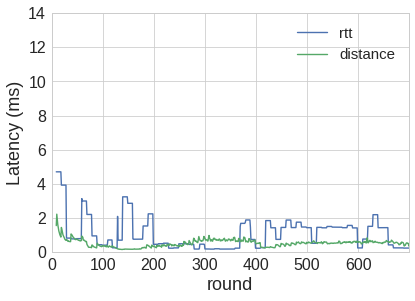

Done


In [2]:
##PARAMETERS
EXP_NAME = 'c2c'
MAX_ROUNDS = 699
MAX_YVAL = 14
# DEFINE OUTPUT DIR
RESULTS_DIR = os.path.join( os.getcwd(),'results/test/UDP',EXP_NAME)
GRAPHS_DIR = os.path.join( os.getcwd(), 'graphs/test/UDP',EXP_NAME)



if __name__ == '__main__':
	nodes_results = read_results()
	#plot_var_per_round(nodes_results,'rtt')
	#plot_var_ecdf_per_round(nodes_results,['AVG RTT', 'AVG distance'])
	plot_comparative(nodes_results,['rtt', 'distance'], 'Latency (ms)')


13.358648235867504
13.13470482204395


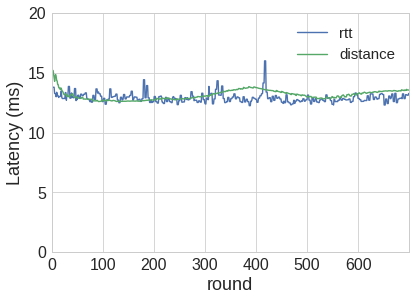

Done


In [3]:
##PARAMETERS
EXP_NAME = 'c2p'
MAX_ROUNDS = 699
MAX_YVAL = 20
# DEFINE OUTPUT DIR
RESULTS_DIR = os.path.join( os.getcwd(),'results/test/UDP',EXP_NAME)
GRAPHS_DIR = os.path.join( os.getcwd(), 'graphs/test/UDP',EXP_NAME)


if __name__ == '__main__':
	nodes_results = read_results()
	#plot_var_per_round(nodes_results,'rtt')
	#plot_var_ecdf_per_round(nodes_results,['AVG RTT', 'AVG distance'])
	plot_comparative(nodes_results,['rtt', 'distance'], 'Latency (ms)')

1.2707067395103782
1.0270818222094216


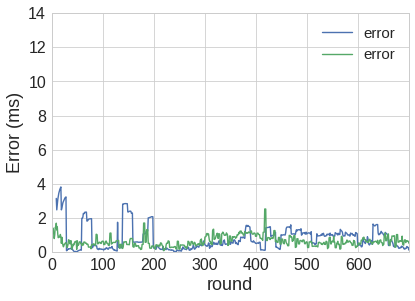

In [3]:
##PARAMETERS
EXP_NAME = 'c'
EXP_NAME1 = 'p'
MAX_ROUNDS = 699
MAX_YVAL = 14
# DEFINE OUTPUT DIR
RESULTS_DIR = os.path.join( os.getcwd(),'results/test/UDP/errors',EXP_NAME)
GRAPHS_DIR = os.path.join( os.getcwd(), 'graphs/test/UDP/errors',EXP_NAME)

RESULTS_DIR1 = os.path.join( os.getcwd(),'results/test/UDP/errors',EXP_NAME1)
GRAPHS_DIR1 = os.path.join( os.getcwd(), 'graphs/test/UDP/errors',EXP_NAME1)


def read_results1():
	"""Reads the results for all the nodes and returns
	a list of pandas Dataframes, one for each node"""
	#Get list of nodes(files) with results
	nodes = [f for f in os.listdir(RESULTS_DIR1) if os.path.isfile(os.path.join(RESULTS_DIR1, f))]
	#Load results from each node
	nodes_results = {}
	for node in nodes:
		f = os.path.join(RESULTS_DIR1,node)
		try:
			nodes_results[node] = pd.read_csv(f)
			nodes_results[node] = nodes_results[node].replace('None',np.nan)
		except Exception:
			print('EXception')
	return nodes_results

def plot_comparative_dataframes(results1,results2, variable):
	# Get median time series for all varibales
	medians = [getMedianDF(results1,variable), getMedianDF(results2, variable)]
	medians[0].rename('Client error')
	medians[1].rename('Proxy error')
	df = pd.concat(medians,axis=1)
	df.plot()
	plt.ylabel('Error (ms)')
	plt.xlim(0,MAX_ROUNDS)
	plt.ylim(0,MAX_YVAL)
	plt.show()
	#input('Done')

if __name__ == '__main__':
	nodes_results = read_results()
	nodes_results1 = read_results1()
	plot_comparative_dataframes(nodes_results,nodes_results1, 'error')

80.77494343790146
79.4787335239144


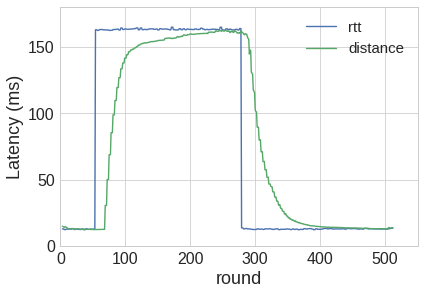

Done


In [5]:
##PARAMETERS
EXP_NAME = 'proxy'
MAX_ROUNDS = 550
MAX_YVAL = 180
# DEFINE OUTPUT DIR
RESULTS_DIR = os.path.join( os.getcwd(),'results/test/UDP/delay',EXP_NAME)
GRAPHS_DIR = os.path.join( os.getcwd(), 'graphs/test/UDP/delay',EXP_NAME)


if __name__ == '__main__':
	nodes_results = read_results()
	#plot_var_per_round(nodes_results,'rtt')
	#plot_var_ecdf_per_round(nodes_results,['AVG RTT', 'AVG distance'])
	plot_comparative(nodes_results,['rtt', 'distance'], 'Latency (ms)')

1.0270818222094216
0.7151460906476514


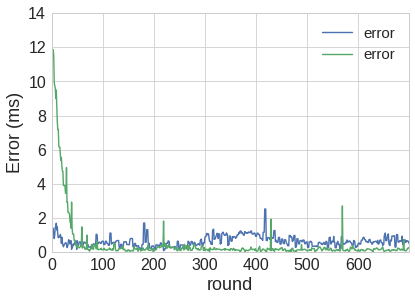

In [55]:
##PARAMETERS
EXP_NAME = 'udp'
EXP_NAME1 = 'http'
MAX_ROUNDS = 699
MAX_YVAL = 14
# DEFINE OUTPUT DIR
RESULTS_DIR = os.path.join( os.getcwd(),'results/errors',EXP_NAME)
GRAPHS_DIR = os.path.join( os.getcwd(), 'graphs/errors',EXP_NAME)

RESULTS_DIR1 = os.path.join( os.getcwd(),'results/errors',EXP_NAME1)
GRAPHS_DIR1 = os.path.join( os.getcwd(), 'graphs/errors',EXP_NAME1)

if __name__ == '__main__':
	nodes_results = read_results()
	#plot_var_per_round(nodes_results,'rtt')
	nodes_results1 = read_results1()    
	#plot_var_ecdf_per_round(nodes_results,['AVG RTT', 'AVG distance'])
	plot_comparative_dataframes(nodes_results,nodes_results1, 'error')

1.0270818222094216
0.7151460906476514


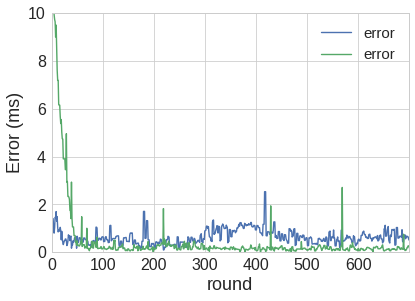

In [4]:
##PARAMETERS
EXP_NAME = 'udp'
EXP_NAME1 = 'http'
MAX_ROUNDS = 699
MAX_YVAL = 10
# DEFINE OUTPUT DIR
RESULTS_DIR = os.path.join( os.getcwd(),'results/errors',EXP_NAME)
GRAPHS_DIR = os.path.join( os.getcwd(), 'graphs/errors',EXP_NAME)

RESULTS_DIR1 = os.path.join( os.getcwd(),'results/errors',EXP_NAME1)
GRAPHS_DIR1 = os.path.join( os.getcwd(), 'graphs/errors',EXP_NAME1)

def plot_comparative_ecdf(results1,results2, var):
	"""Plot the ECDF of the median accross the nodes of a variable"""
	lbl = []
	median1 = getMedianDF(results1,var)
	median2 = getMedianDF(results2,var)
	ecdf1 = getECDF(median1)
	ecdf2 = getECDF(median2)
	ecdf1.plot(label='UDP error', legend=True)
	ecdf2.plot(label='HTTP error')
	plt.ylabel('ECDF')
	lbl.append('UDP error')
	lbl.append('HTTP error')
	plt.legend(lbl, loc = 'lower right')
	plt.xlim(0,MAX_YVAL)
	plt.show()
	#input('Done')
    
if __name__ == '__main__':
	nodes_results = read_results()
	#plot_var_per_round(nodes_results,'rtt')
	nodes_results1 = read_results1()    
	#plot_var_ecdf_per_round(nodes_results,['AVG RTT', 'AVG distance'])
	#plot_comparative_ecdf(nodes_results,nodes_results1, 'error')
	plot_comparative_dataframes(nodes_results,nodes_results1, 'error')

In [ ]:
##PARAMETERS
EXP_NAME = 'regular'
EXP_NAME1 = 'udp'
MAX_ROUNDS = 699
MAX_YVAL = 10
# DEFINE OUTPUT DIR
RESULTS_DIR = os.path.join( os.getcwd(),'results/broad_test/',EXP_NAME)
GRAPHS_DIR = os.path.join( os.getcwd(), 'graphs/broad_test/',EXP_NAME)

RESULTS_DIR1 = os.path.join( os.getcwd(),'results/test/UDP/errors',EXP_NAME1)
GRAPHS_DIR1 = os.path.join( os.getcwd(), 'graphs/errors',EXP_NAME1)

def plot_comparative_ecdf(results1,results2, var):
	"""Plot the ECDF of the median accross the nodes of a variable"""
	lbl = []
	median1 = getMedianDF(results1,var)
	median2 = getMedianDF(results2,var)
	ecdf1 = getECDF(median1)
	ecdf2 = getECDF(median2)
	ecdf1.plot(label='UDP error', legend=True)
	ecdf2.plot(label='HTTP error')
	plt.ylabel('ECDF')
	lbl.append('UDP error')
	lbl.append('HTTP error')
	plt.legend(lbl, loc = 'lower right')
	plt.xlim(0,MAX_YVAL)
	plt.show()
	#input('Done')
    
if __name__ == '__main__':
	nodes_results = read_results()
	#plot_var_per_round(nodes_results,'rtt')
	nodes_results1 = read_results1()    
	#plot_var_ecdf_per_round(nodes_results,['AVG RTT', 'AVG distance'])
	#plot_comparative_ecdf(nodes_results,nodes_results1, 'error')
	plot_comparative_dataframes(nodes_results,nodes_results1, 'error')